In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import string
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#regular expression
import re



In [4]:
fake_data = pd.read_csv('Fake.csv')
true_data = pd.read_csv('True.csv')

In [5]:
#head for top 5 data sets
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
#tail for last 5 data sets
true_data.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [7]:
fake_data["class"]=0
true_data["class"]=1

In [8]:
#shape repesent the rows and cols (rows,col)
fake_data.shape,true_data.shape

((23481, 5), (21417, 5))

In [9]:
#deleting 10 rows from each data set
fake_data_manualtest = fake_data.tail(10)
for i in range(23480, 23470, -1):
    if i in fake_data.index:
        fake_data.drop([i], axis=0, inplace=True)

# For true_data
true_data_manualtest = true_data.tail(10)
for i in range(21416, 21406, -1):
    if i in true_data.index:
        true_data.drop([i], axis=0, inplace=True)

In [10]:
fake_data.shape, true_data.shape

((23471, 5), (21407, 5))

In [11]:
fake_data_manualtest['class']=0
true_data_manualtest['class']=1

C:\Users\al_sh\AppData\Local\Temp\ipykernel_13860\2328352263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_data_manualtest['class']=0
C:\Users\al_sh\AppData\Local\Temp\ipykernel_13860\2328352263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_data_manualtest['class']=1


In [12]:
fake_data_manualtest.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [13]:
true_data_manualtest.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [14]:
merge_data=pd.concat([fake_data,true_data],axis=0)
merge_data.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [15]:
merge_data.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [16]:
data=merge_data.drop(['title', 'subject', 'date'], axis=1)

In [17]:
#checking null values
data.isnull().sum()

text     0
class    0
dtype: int64

In [18]:
data=data.sample(frac=1)


In [19]:
# 1 for true 0 for fake
data.head()

,text,class
7711,"(Reuters) - Forget the accusations of groping,...",1
20486,Barack only needs to find the closest mirror t...,0
10412,WASHINGTON (Reuters) - U.S. Senator Mike Lee o...,1
910,WASHINGTON (Reuters) - The U.S. Senate Commerc...,1
12386,,0


In [20]:
data.reset_index(inplace = True)
data.drop(['index'],axis=1,inplace =True)

In [21]:
data.columns

Index(['text', 'class'], dtype='object')

In [22]:
data.head()

,text,class
0,"(Reuters) - Forget the accusations of groping,...",1
1,Barack only needs to find the closest mirror t...,0
2,WASHINGTON (Reuters) - U.S. Senator Mike Lee o...,1
3,WASHINGTON (Reuters) - The U.S. Senate Commerc...,1
4,,0


In [23]:
    #Function to remove special characters and clean the dataset
    def remove_func(text):
        text = text.lower()
        #Using raw string to handle escape sequences
        text = re.sub(r'\[.*?\]', '', text)
        #Using raw string for non-word characters
        text = re.sub(r'\W', ' ', text)  
        #Using raw string for URLs
        text = re.sub(r'https?://\S+|www\.\S+', '', text)  
        #Using raw string for HTML tags
        text = re.sub(r'<.*?>+', '', text)  
        #Removing punctuation
        text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  
        #Removing newline characters
        text = re.sub(r'\n', '', text)
        #Removing words containing numbers
        text = re.sub(r'\w*\d\w*', '', text)  
        return text

In [24]:
data['text'] = data['text'].apply(remove_func)

In [25]:
x=data['text']
y=data['class']

In [26]:
#split train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

vector=TfidfVectorizer()
xv_train=vector.fit_transform(x_train)
xv_test=vector.transform(x_test)

In [28]:
from sklearn.linear_model import LogisticRegression

LR =LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [29]:
#accuracy
LR.score(xv_test,y_test)

0.9861853832442068

In [30]:
pred_lr= LR.predict(xv_test)
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5860
           1       0.99      0.99      0.99      5360

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
dtc.fit(xv_train,y_train)

DecisionTreeClassifier()

In [32]:
pred_dtc =dtc.predict(xv_test)

In [33]:
dtc.score(xv_test,y_test)

0.9950089126559715

In [34]:
print(classification_report(y_test, pred_dtc))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5860
           1       1.00      0.99      0.99      5360

    accuracy                           1.00     11220
   macro avg       1.00      0.99      0.99     11220
weighted avg       1.00      1.00      1.00     11220



In [35]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(random_state=0)
gbc.fit(xv_train,y_train)

GradientBoostingClassifier(random_state=0)

In [36]:
pred_gbc=gbc.predict(xv_test)

In [37]:
gbc.score(xv_test,y_test)

0.9958110516934047

In [38]:
print(classification_report(y_test,pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5860
           1       0.99      1.00      1.00      5360

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(random_state=0)
rfc.fit(xv_train,y_train)

RandomForestClassifier(random_state=0)

In [40]:
pred_rfc=rfc.predict(xv_test)

In [41]:
rfc.score(xv_test,y_test)

0.989572192513369

In [42]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5860
           1       0.99      0.99      0.99      5360

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def output(n):
    if n == 0:
        return "The News is fake"
    elif n == 1:
        return "The News is legit"

def manual_test(news):
    # Prepare the news data for prediction
    testing_news = {"text": [news]}  # Corrected dictionary syntax
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(remove_func)
    new_x_test = new_def_test["text"]
    new_xv_test = vector.transform(new_x_test)  # Fixed the typo 'trransform'
    
    # Get predictions from all models
    pred_lr = LR.predict(new_xv_test)
    pred_dtc = dtc.predict(new_xv_test)
    pred_gbc = gbc.predict(new_xv_test)
    pred_rfc = rfc.predict(new_xv_test)

    # Display the prediction of the Logistic Regression model
    print("\n\n Prediction (Logistic Regression): {}".format(output(pred_lr[0])))

    # Create a dictionary to store the results for the bar chart
    model_predictions = {
        'Logistic Regression': pred_lr[0],
        'Random Forest': pred_rfc[0]
    }

    # Convert predictions to labels for plotting
    model_labels = ['Fake' if prediction == 0 else 'Legit' for prediction in model_predictions.values()]

    # Plot the bar chart for predictions
    plt.figure(figsize=(8, 5))
    bars = plt.bar(model_predictions.keys(), model_predictions.values(), color=['red' if label == 'Fake' else 'green' for label in model_labels])

    # Add labels to each bar
    for bar, label in zip(bars, model_labels):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), label, ha='center', va='bottom', fontsize=12)

    # Customize the plot
    plt.title('Predictions of Different Models for the Given News', fontsize=14)
    plt.xlabel('Models', fontsize=12)
    plt.ylabel('Prediction (0 = Fake, 1 = Legit)', fontsize=12)
    plt.ylim(-0.1, 1.1)
    plt.axhline(0.5, color='gray', linestyle='--')  # Reference line for visualization
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()


 A court in Moscow has sentenced a French researcher to three years in a penal colony for breaking Russia's controversial law on registering as a "foreign agent".  Laurent Vinatier, who worked for a Switzerland-based conflict mediation NGO, was arrested in June while gathering what prosecutors say was information on Russia's military.  Speaking in the courtroom in Russian, Vinatier apologised, saying he was unaware he should have registered. The 48-year-old, who had earlier admitted his guilt, recited a verse by Russian poet Alexander Pushkin.  A plea by Vinatier's defence team for him to be fined instead of facing a jail term was dismissed by the presiding judge. The team said he would appeal.  France has not publicly commented on the Moscow court's verdict. President Emmanuel Macron had earlier demanded Vinatier's release.




 Prediction (Logistic Regression): The News is legit


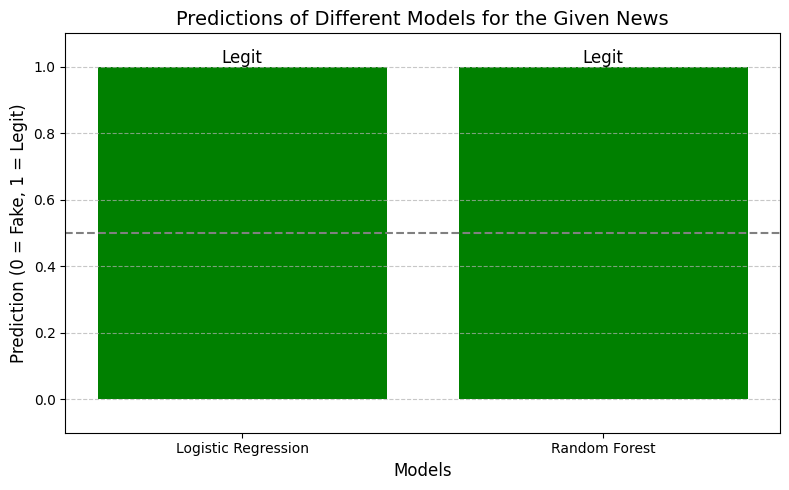

In [56]:
#news by BBC
news=str(input())
manual_test(news)

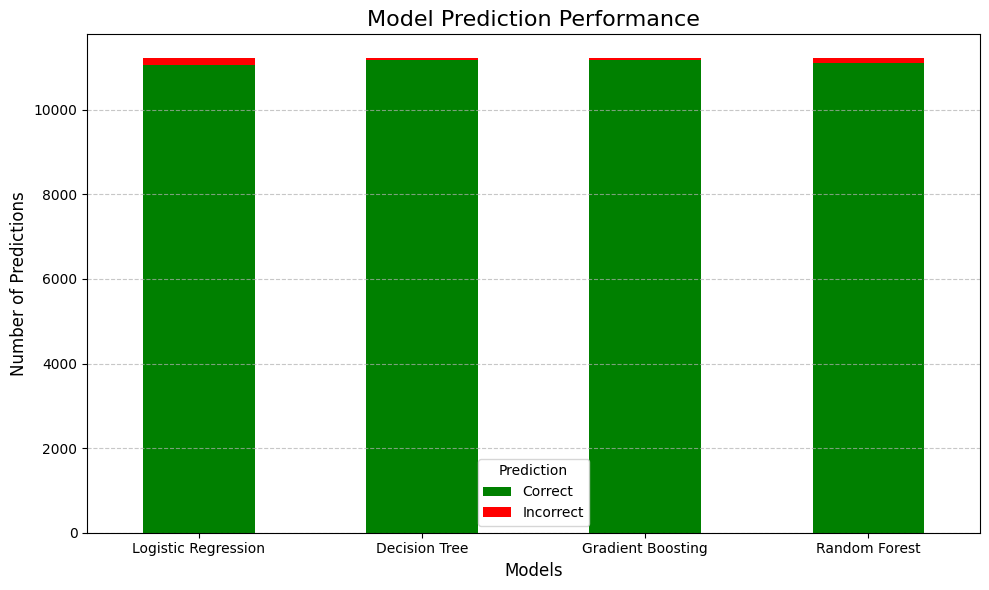

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrices for each model
cm_lr = confusion_matrix(y_test, pred_lr)
cm_dtc = confusion_matrix(y_test, pred_dtc)
cm_gbc = confusion_matrix(y_test, pred_gbc)
cm_rfc = confusion_matrix(y_test, pred_rfc)

# Create a dictionary to store correct and incorrect predictions for each model
model_results = {
    'Logistic Regression': [cm_lr[0, 0] + cm_lr[1, 1], cm_lr[0, 1] + cm_lr[1, 0]],
    'Decision Tree': [cm_dtc[0, 0] + cm_dtc[1, 1], cm_dtc[0, 1] + cm_dtc[1, 0]],
    'Gradient Boosting': [cm_gbc[0, 0] + cm_gbc[1, 1], cm_gbc[0, 1] + cm_gbc[1, 0]],
    'Random Forest': [cm_rfc[0, 0] + cm_rfc[1, 1], cm_rfc[0, 1] + cm_rfc[1, 0]],
}

# Convert the dictionary to a DataFrame for easy plotting
df_results = pd.DataFrame(model_results, index=['Correct', 'Incorrect'])

# Plot the bar chart
plt.figure(figsize=(10, 6))
df_results.T.plot(kind='bar', stacked=True, color=['green', 'red'], ax=plt.gca())

# Add labels and title
plt.title('Model Prediction Performance', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Number of Predictions', fontsize=12)
plt.legend(title='Prediction', labels=['Correct', 'Incorrect'])
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


 n a shocking turn of events, astronomers from the International Space Research Institute have announced the discovery of a hidden planet orbiting just behind the Moon. Dubbed "Lunaria," this new celestial body has gone undetected by modern telescopes due to its unique reflective surface, which mimics the darkness of space. Scientists claim that Lunaria is almost as large as Mars and might even have conditions that could support life. The discovery has sparked global interest, with space agencies around the world planning a mission to explore this mysterious planet. However, conspiracy theories are already circulating, with some suggesting that Lunaria has been known to governments for years and kept secret for unknown reasons.




 Prediction (Logistic Regression): The News is fake


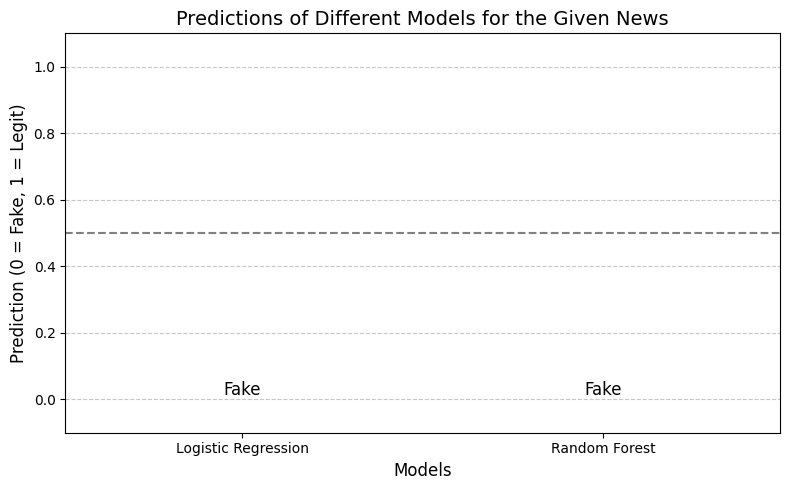

In [46]:
#news by chatgpt
news=str(input())
manual_test(news)

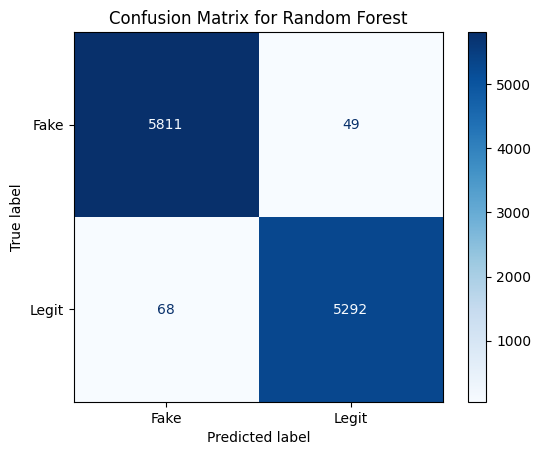

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Confusion Matrix for Random Forest
cm_rfc = confusion_matrix(y_test, pred_rfc)
disp_rfc = ConfusionMatrixDisplay(confusion_matrix=cm_rfc, display_labels=["Fake", "Legit"])
disp_rfc.plot(cmap='Blues')
plt.title("Confusion Matrix for Random Forest")
plt.show()


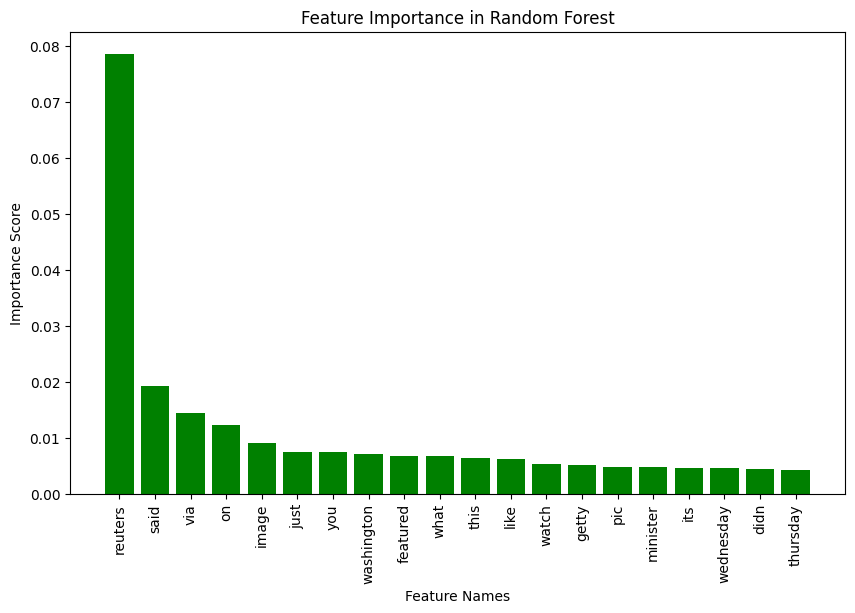

In [60]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance in Random Forest")
plt.bar(range(len(indices[:20])), importances[indices][:20], color="green", align="center")
plt.xticks(range(len(indices[:20])), [vector.get_feature_names_out()[i] for i in indices[:20]], rotation=90)
plt.xlabel("Feature Names")
plt.ylabel("Importance Score")
plt.show()


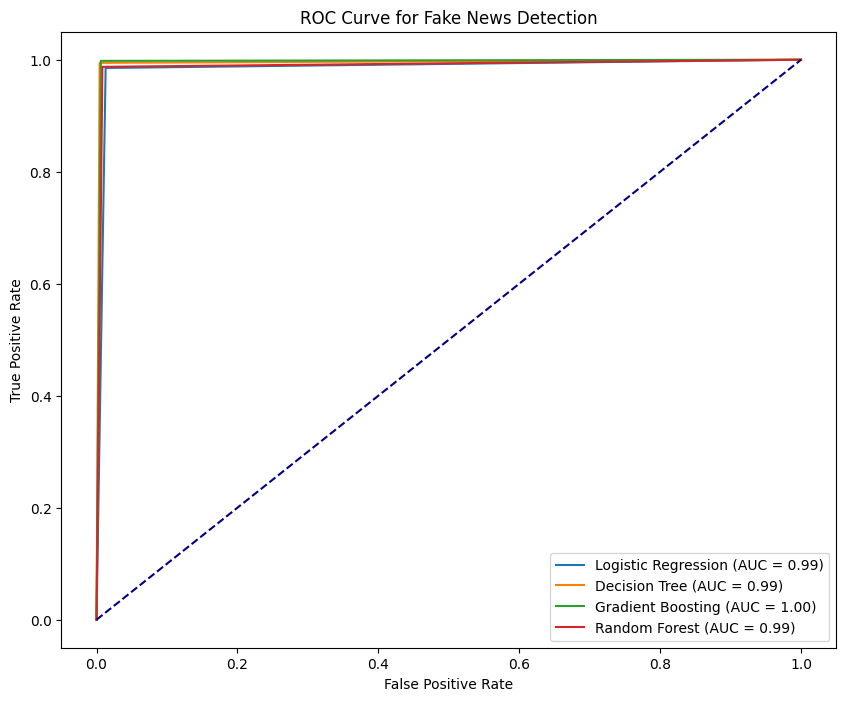

In [49]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1])

# Compute ROC curve and ROC area for each model
models = {"Logistic Regression": pred_lr, "Decision Tree": pred_dtc, "Gradient Boosting": pred_gbc, "Random Forest": pred_rfc}

plt.figure(figsize=(10, 8))
for model_name, preds in models.items():
    fpr, tpr, _ = roc_curve(y_test_bin, preds)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Fake News Detection')
plt.legend(loc="lower right")
plt.show()
